# Desafio do Grupo de Assinantes da semana 2

Dataset com 100mil observações de 2016 a 2018 sobre vendas de ecommerce. Dataset real porém companhias e parceiros com nomes alterados.

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_orders_dataset.csv

Desafio

No dataset da Olist, temos as ordens de compras e datas de
cadastro dos usuários. Imagine que você trabalhe na empresa e seu chefe te peça um modelo para prever quais usuários têm maior probabilidade de fazer uma segunda compra em até 30 dias após a realização da primeira. Segundo um estudo feito no passado, estes usuários possuem maior probabilidade de fidelizar na empresa e passar a realizar aquisições mensalmente. Bora criar um dataset bem básico que servirá de esqueleto para este modelo? Sabe como começar a construir esse dataset? Antes de ler o próximo parágrafo, dê uma olhada nos datasets da Olist e veja se você consegue descobrir como fazer isso sem dica alguma. Depois, veja se pensamos no mesmo método!

Eu te ajudo, vamos pensar: você precisa obter a primeira compra de cada usuário. Isso pode ser obtido no dataset olist_orders_dataset, que já até possui a chave de identificação do usuário. A data de compra é o campo order_purchase_timestamp. Ali, você terá a primeira e segunda compra. Basta colocar a primeira compra em uma coluna, a segunda compra em outra coluna e tirar a diferença delas. **Se a diferença for menor que 30 dias, o nosso target (= fez a segunda compra em 30 dias) receberá 1, caso contrário, receberá 0. Será que você consegue?**

In [ ]:
import pandas as pd
import numpy as np

**Schema do dataset**

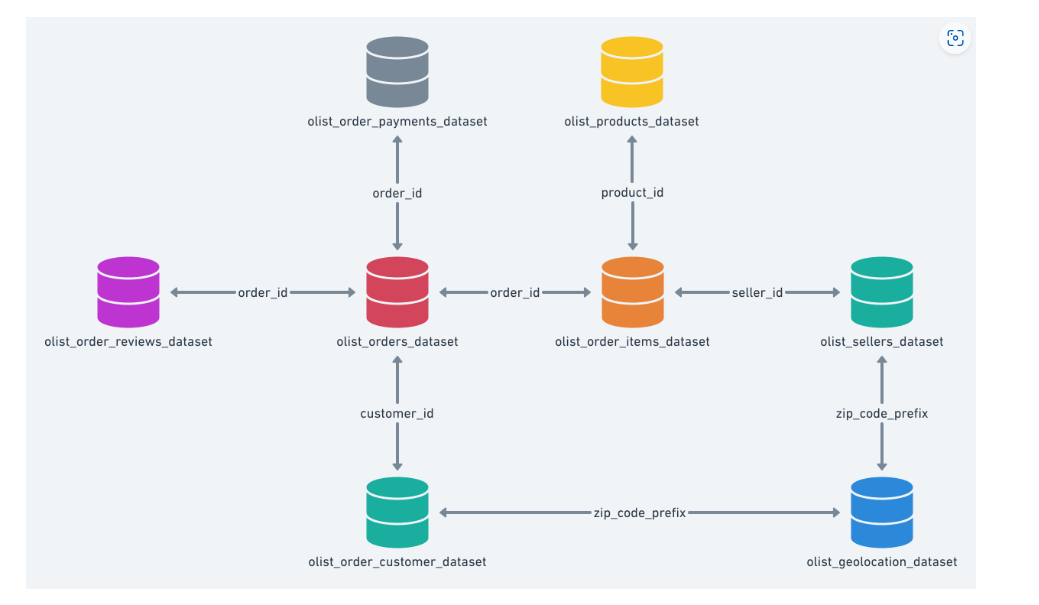

In [ ]:
df_order = pd.read_csv("/content/drive/MyDrive/Programação/GRUPO DE ASSINANTES/SEMANA_2/dataset/olist_orders_dataset.csv", parse_dates=['order_purchase_timestamp'])
df_customer = pd.read_csv("/content/drive/MyDrive/Programação/GRUPO DE ASSINANTES/SEMANA_2/dataset/olist_customers_dataset.csv")

### Análise rápida do dataset order_purchase

In [ ]:
# Dataset
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Informações dataset order
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


In [ ]:
# Para o desafio só há necessidade de duas colunas customer_id e order_purchase_timestamp
df_order = df_order[['customer_id', 'order_purchase_timestamp']]

df_order.head()

,customer_id,order_purchase_timestamp
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


In [ ]:
# Número de customer_id duplicados
df_order['customer_id'].duplicated().sum()

0

### Análise rápida do dataset order_customer

In [ ]:
# Dataset Customer
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# Informações
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# Qual customer unique se repete mais de uma vez
df_customer['customer_unique_id'].value_counts() > 1

8d50f5eadf50201ccdcedfb9e2ac8455     True
3e43e6105506432c953e165fb2acf44c     True
1b6c7548a2a1f9037c1fd3ddfed95f33     True
ca77025e7201e3b30c44b472ff346268     True
6469f99c1f9dfae7733b25662e7f1782     True
                                    ...  
081f07439678af2da7755a0aa572154d    False
9c57789a6a587f4efcfb01e36c106014    False
9e4c21635f640562de1a6976374fba03    False
06c0ea6ee892364d1608ee47aa9f56a0    False
84732c5050c01db9b23e19ba39899398    False
Name: customer_unique_id, Length: 96096, dtype: bool

In [ ]:
# Colunas customer_id e customer_unique_id são únicas colunas que precisamos para esse problema
df_customer = df_customer[['customer_id', 'customer_unique_id']]
df_customer.head()

,customer_id,customer_unique_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066


In [ ]:
# Merge entre os dois dataframe
df_final = pd.merge(df_customer, df_order, on='customer_id')
df_final.head()

,customer_id,customer_unique_id,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30


In [ ]:
# Assim conseguimos consumidores que compraram mais de uma vez
df_final[['customer_unique_id', 'customer_id', 'order_purchase_timestamp']].loc[df_final['customer_unique_id'] == '8d50f5eadf50201ccdcedfb9e2ac8455']

,customer_unique_id,customer_id,order_purchase_timestamp
14186,8d50f5eadf50201ccdcedfb9e2ac8455,1bd3585471932167ab72a84955ebefea,2017-11-22 20:01:53
15321,8d50f5eadf50201ccdcedfb9e2ac8455,a8fabc805e9a10a3c93ae5bff642b86b,2018-05-21 22:44:31
16654,8d50f5eadf50201ccdcedfb9e2ac8455,897b7f72042714efaa64ac306ba0cafc,2018-08-07 23:32:14
36122,8d50f5eadf50201ccdcedfb9e2ac8455,b2b13de0770e06de50080fea77c459e6,2017-06-18 22:56:48
38073,8d50f5eadf50201ccdcedfb9e2ac8455,42dbc1ad9d560637c9c4c1533746f86d,2017-07-24 22:11:50
40141,8d50f5eadf50201ccdcedfb9e2ac8455,dfb941d6f7b02f57a44c3b7c3fefb44b,2017-07-18 23:10:58
48614,8d50f5eadf50201ccdcedfb9e2ac8455,65f9db9dd07a4e79b625effa4c868fcb,2018-07-23 21:53:02
52574,8d50f5eadf50201ccdcedfb9e2ac8455,1c62b48fb34ee043310dcb233caabd2e,2017-08-05 08:59:43
58707,8d50f5eadf50201ccdcedfb9e2ac8455,a682769c4bc10fc6ef2101337a6c83c9,2018-08-20 19:14:26
67996,8d50f5eadf50201ccdcedfb9e2ac8455,6289b75219d757a56c0cce8d9e427900,2018-05-22 23:08:55


In [ ]:
# Não precisamos mais do customer_id
df_final.drop(['customer_id'], axis=1, inplace=True)

In [ ]:
# Drop das duplicadas geradas no merge
df_final.drop_duplicates(keep=False, inplace=True)

# Cunsumidores que realizaram mais do que uma compra
keys = df_final['customer_unique_id'].value_counts()[df_final['customer_unique_id'].value_counts() > 1].index

# Novo Dataframe com apenas consumidores com 2 compras ou mais e seu respectivo horário de compra e ordenação
df_2 = df_final.loc[df_final['customer_unique_id'].isin(keys)].sort_values(by=['order_purchase_timestamp']).reset_index(drop=True)

df_2.head(8)

,customer_unique_id,order_purchase_timestamp
0,32ea3bdedab835c3aa6cb68ce66565ef,2016-10-03 09:44:50
1,0b3dc7efaafb0cf78a4796d42fa8d74c,2016-10-04 14:49:13
2,4e23e1826902ec9f208e8cc61329b494,2016-10-05 12:32:55
3,94e5ea5a8c1bf546db2739673060c43f,2016-10-05 21:10:56
4,f7b62c75467e8ce080b201667cbbc274,2016-10-06 14:59:56
5,ccafc1c3f270410521c3c6f3b249870f,2016-10-06 19:33:34
6,f7b62c75467e8ce080b201667cbbc274,2016-10-07 08:28:29
7,7a176e5d88c7acb6000a055e008c055d,2016-10-08 17:43:25


In [ ]:
# Listas vazias
list_1 = []
list_2 = []
list_3 = []
list_4 = []

# Um 'for' para percorrer o dataframe e recolher as datas de primeira e segunda compra dos clientes
for i in range(len(df_2)):

  if not df_2.loc[i][0] in list_1:
      list_1.append(df_2.loc[i][0])
      list_3.append(i)

  elif not df_2.loc[i][0] in list_2:
      list_2.append(df_2.loc[i][0])
      list_4.append(i)

  else:
    pass

# Criação do novo dataframe
compra_1 = (df_2['order_purchase_timestamp'].iloc[list_3]).values
compra_2 = (df_2['order_purchase_timestamp'].iloc[list_4]).values

df_3 = pd.DataFrame(data={'Id_cliente': list_1, 'Primeira_compra': compra_1, 'Segunda_compra': compra_2})

In [ ]:
# Primeiras linhas e informações do novo dataset
display(df_3.head())
print('\n')
display(df_3.info())

,Id_cliente,Primeira_compra,Segunda_compra
0,32ea3bdedab835c3aa6cb68ce66565ef,2016-10-03 09:44:50,2016-10-07 08:28:29
1,0b3dc7efaafb0cf78a4796d42fa8d74c,2016-10-04 14:49:13,2016-10-08 17:43:26
2,4e23e1826902ec9f208e8cc61329b494,2016-10-05 12:32:55,2016-10-10 15:50:01
3,94e5ea5a8c1bf546db2739673060c43f,2016-10-05 21:10:56,2017-01-05 11:56:06
4,f7b62c75467e8ce080b201667cbbc274,2016-10-06 14:59:56,2017-01-05 12:09:08




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Id_cliente       2712 non-null   object        
 1   Primeira_compra  2712 non-null   datetime64[ns]
 2   Segunda_compra   2712 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 63.7+ KB


None

In [ ]:
# Variável target criada
df_3['target'] = ((df_3['Primeira_compra'] - df_3['Segunda_compra']).dt.days * (-1)).apply(lambda x: 1 if x < 31 else 0) # subtração das datas e condição se ela tem menos do que 31 dias

df_3.head()

,Id_cliente,Primeira_compra,Segunda_compra,target
0,32ea3bdedab835c3aa6cb68ce66565ef,2016-10-03 09:44:50,2016-10-07 08:28:29,1
1,0b3dc7efaafb0cf78a4796d42fa8d74c,2016-10-04 14:49:13,2016-10-08 17:43:26,1
2,4e23e1826902ec9f208e8cc61329b494,2016-10-05 12:32:55,2016-10-10 15:50:01,1
3,94e5ea5a8c1bf546db2739673060c43f,2016-10-05 21:10:56,2017-01-05 11:56:06,0
4,f7b62c75467e8ce080b201667cbbc274,2016-10-06 14:59:56,2017-01-05 12:09:08,0


In [ ]:
# Contagem dos valores da váriavel target
df_3['target'].value_counts()

0    2589
1     123
Name: target, dtype: int64